In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling
import missingno as msno
% matplotlib inline
% config InlineBackend.figure_format='retina'

sns.set()


In [5]:
players = pd.read_csv(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\RedCard\data\\raw_players.csv.gz",
    compression="gzip", index_col=[0]
)
print(players.shape)
players[:5]


(2053, 7)


,birthday,height,weight,position,photoID,rater1,rater2
playerShort,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25


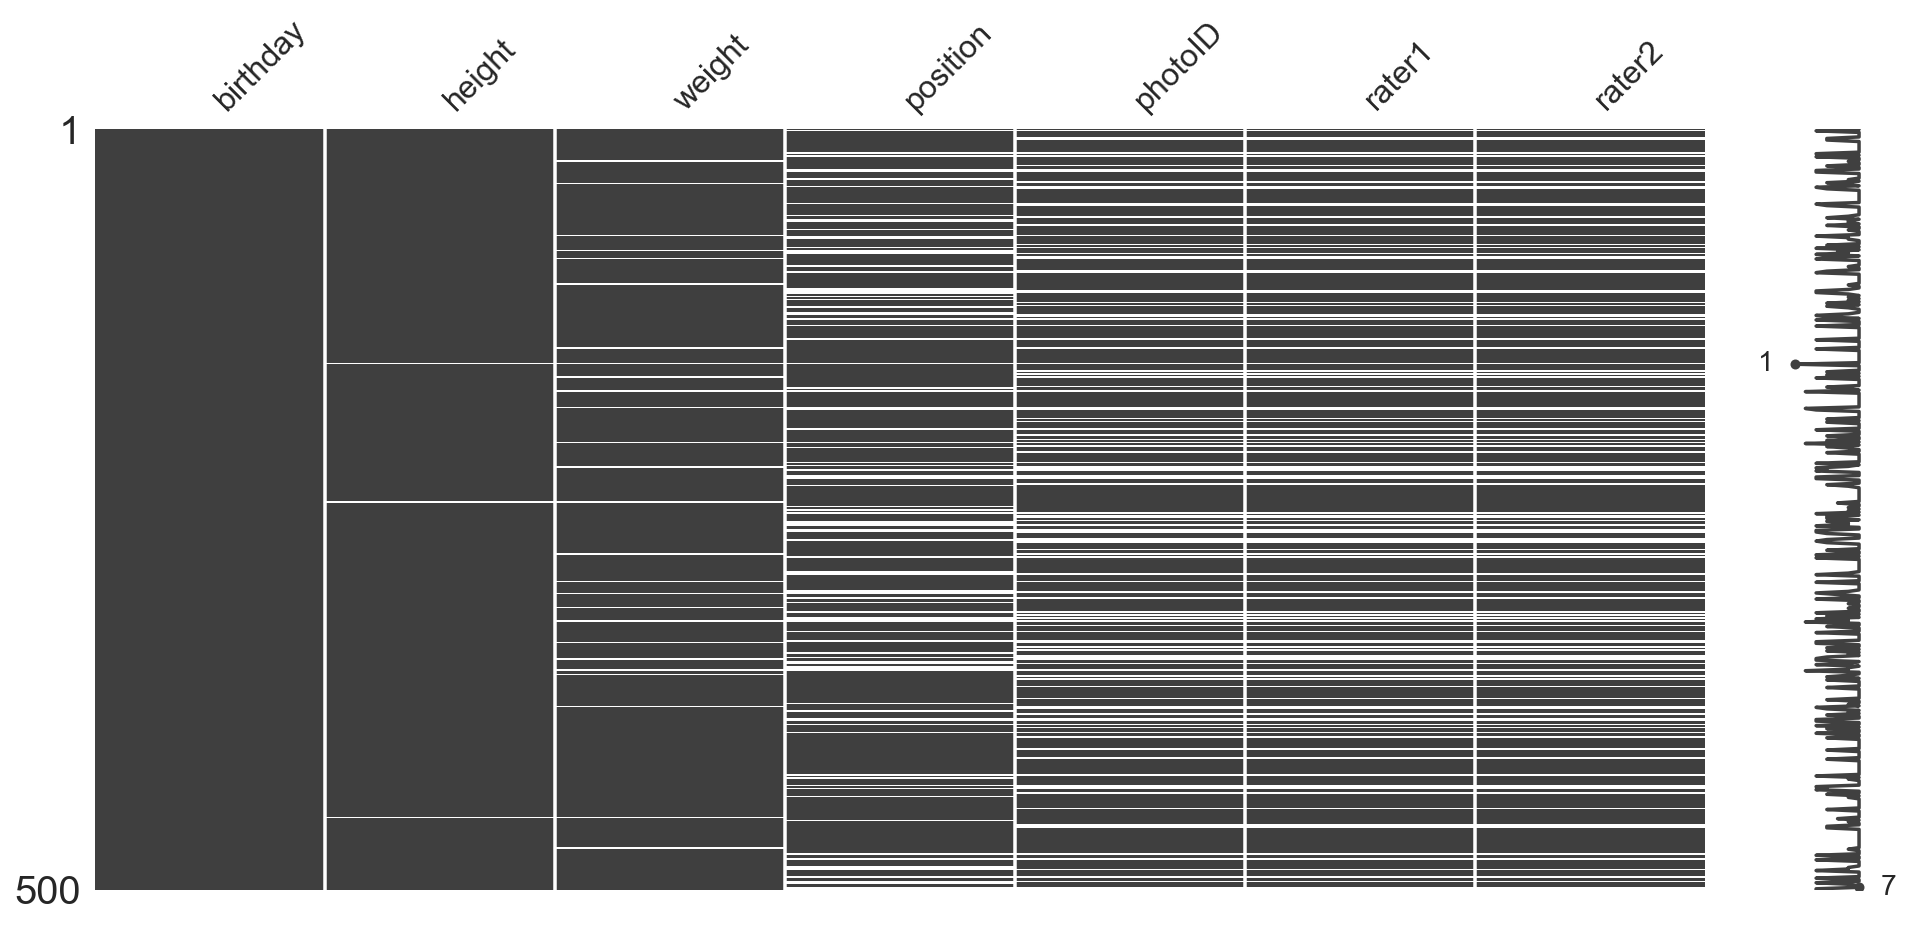

In [7]:
# 查看空值
msno.matrix(players.sample(500), figsize=(16, 7), width_ratios=(15, 1))

# 全黑的表示没有空值，白色的地方就表示空值


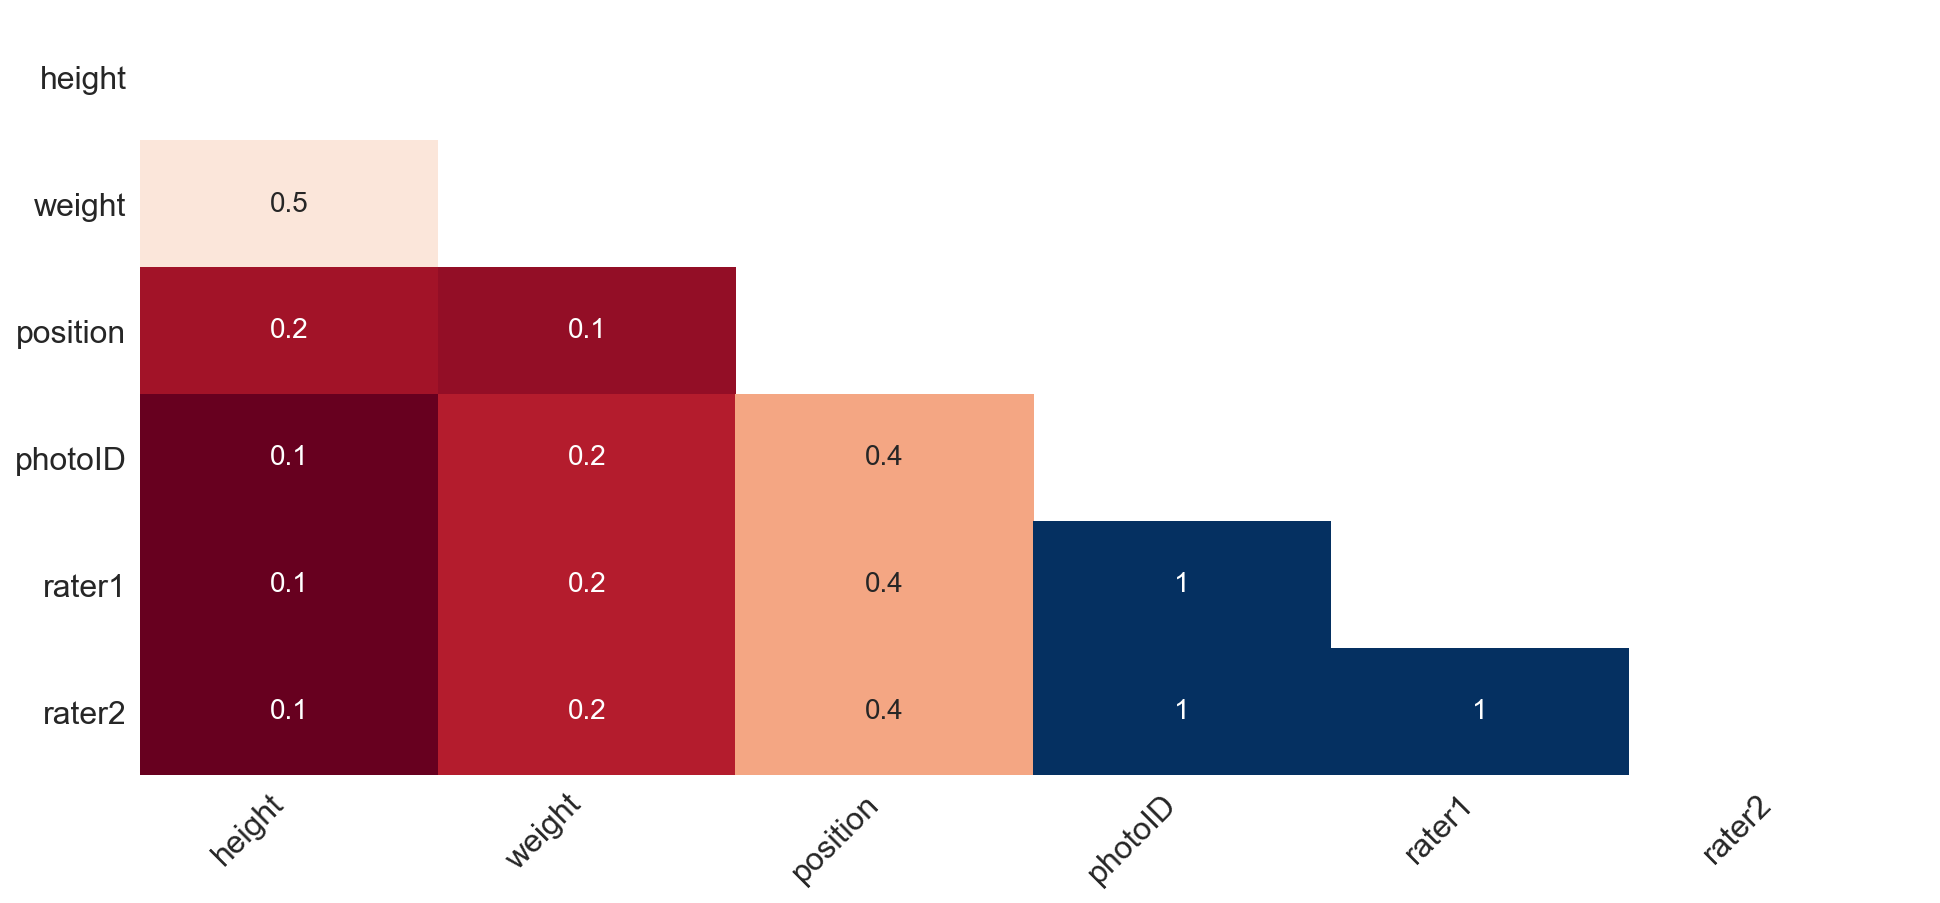

In [8]:
# 查看空值的关联性
msno.heatmap(players.sample(500), figsize=(16, 7))

# ranges from 
# -1 (if one variable appears the other definitely does not) to 
# 0 (variables appearing or not appearing have no effect on one another) to 
# 1 (if one variable appears the other definitely also does).

# A和B的值越接近1表示，A出现，B越有可能出现


In [9]:
# 查看空值的个数
print("All players:", len(players))
print("rater1 nulls:", len(players[players["rater1"].isnull()]))
print("rater2 nulls:", len(players[players["rater2"].isnull()]))
print("Both nulls:", len(players[players["rater1"].isnull() & players["rater2"].isnull()]))

# 验证了上面热度图里面rater1和rater2的关系


All players: 2053
rater1 nulls: 468
rater2 nulls: 468
Both nulls: 468


In [10]:
# 删除rater1为空的行
players = players[players["rater1"].notnull()]
players.shape


(1585, 7)

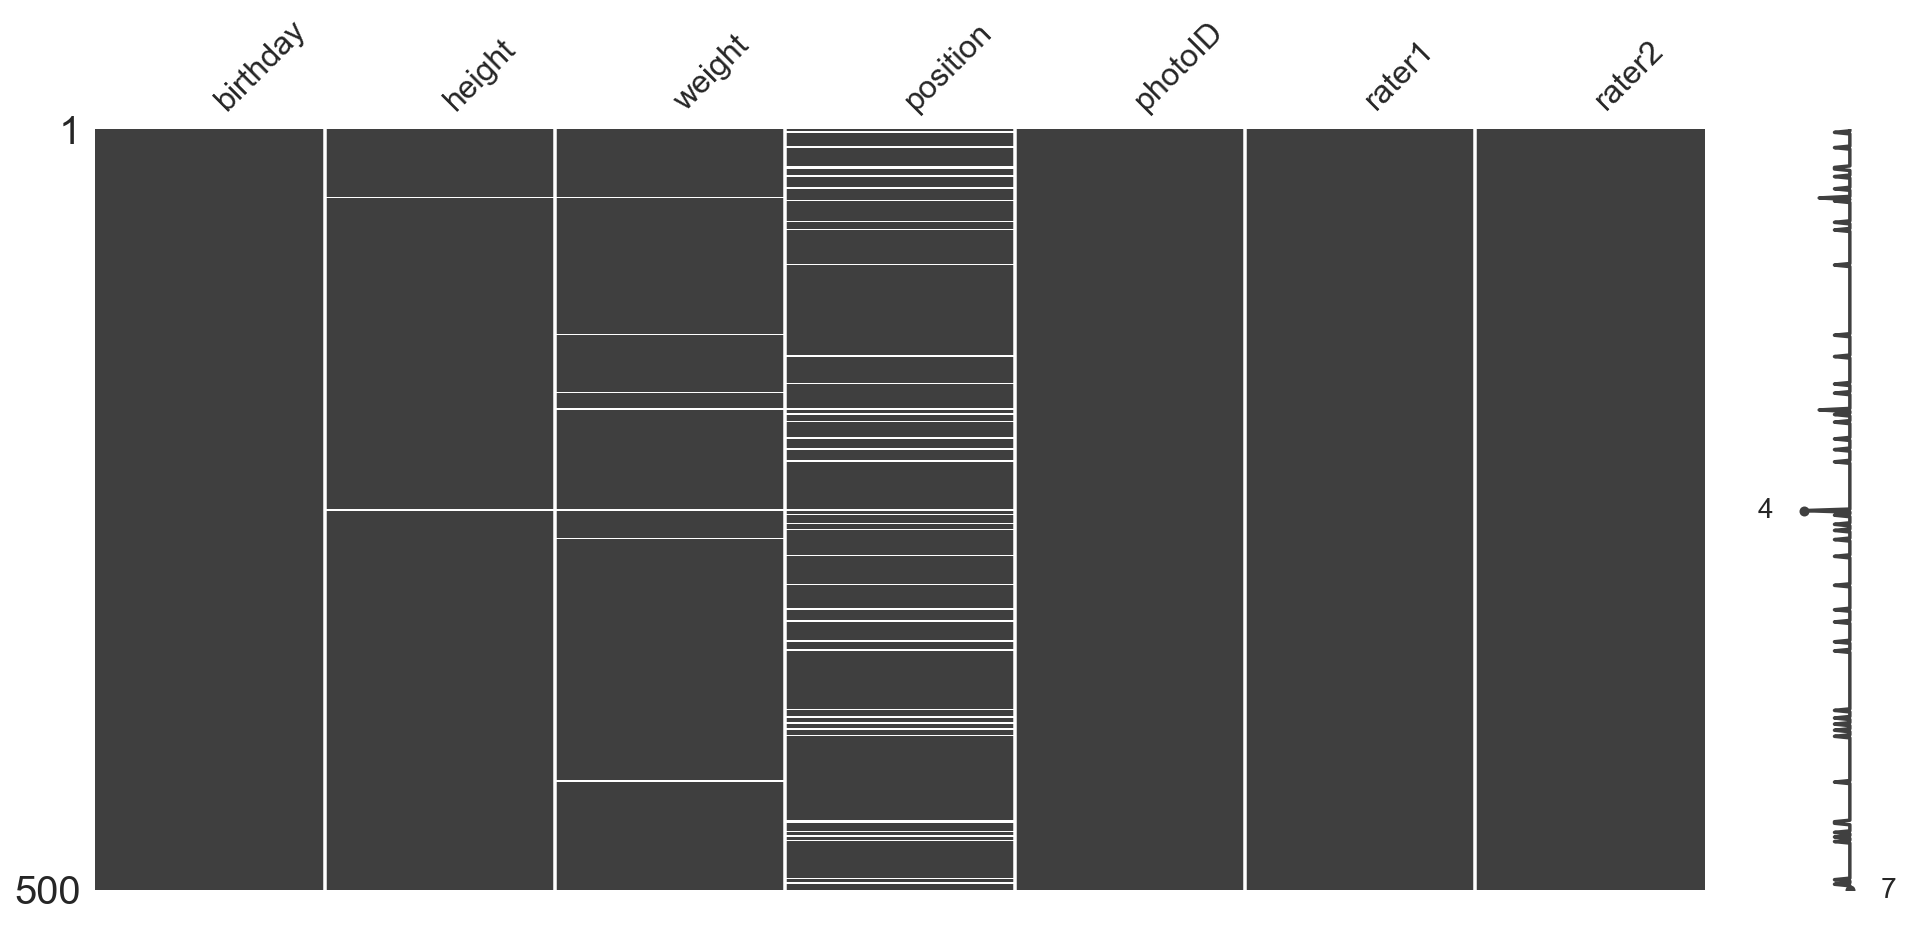

In [11]:
# msno查看空值情况
msno.matrix(players.sample(500), figsize=(16, 7), width_ratios=(15, 1))


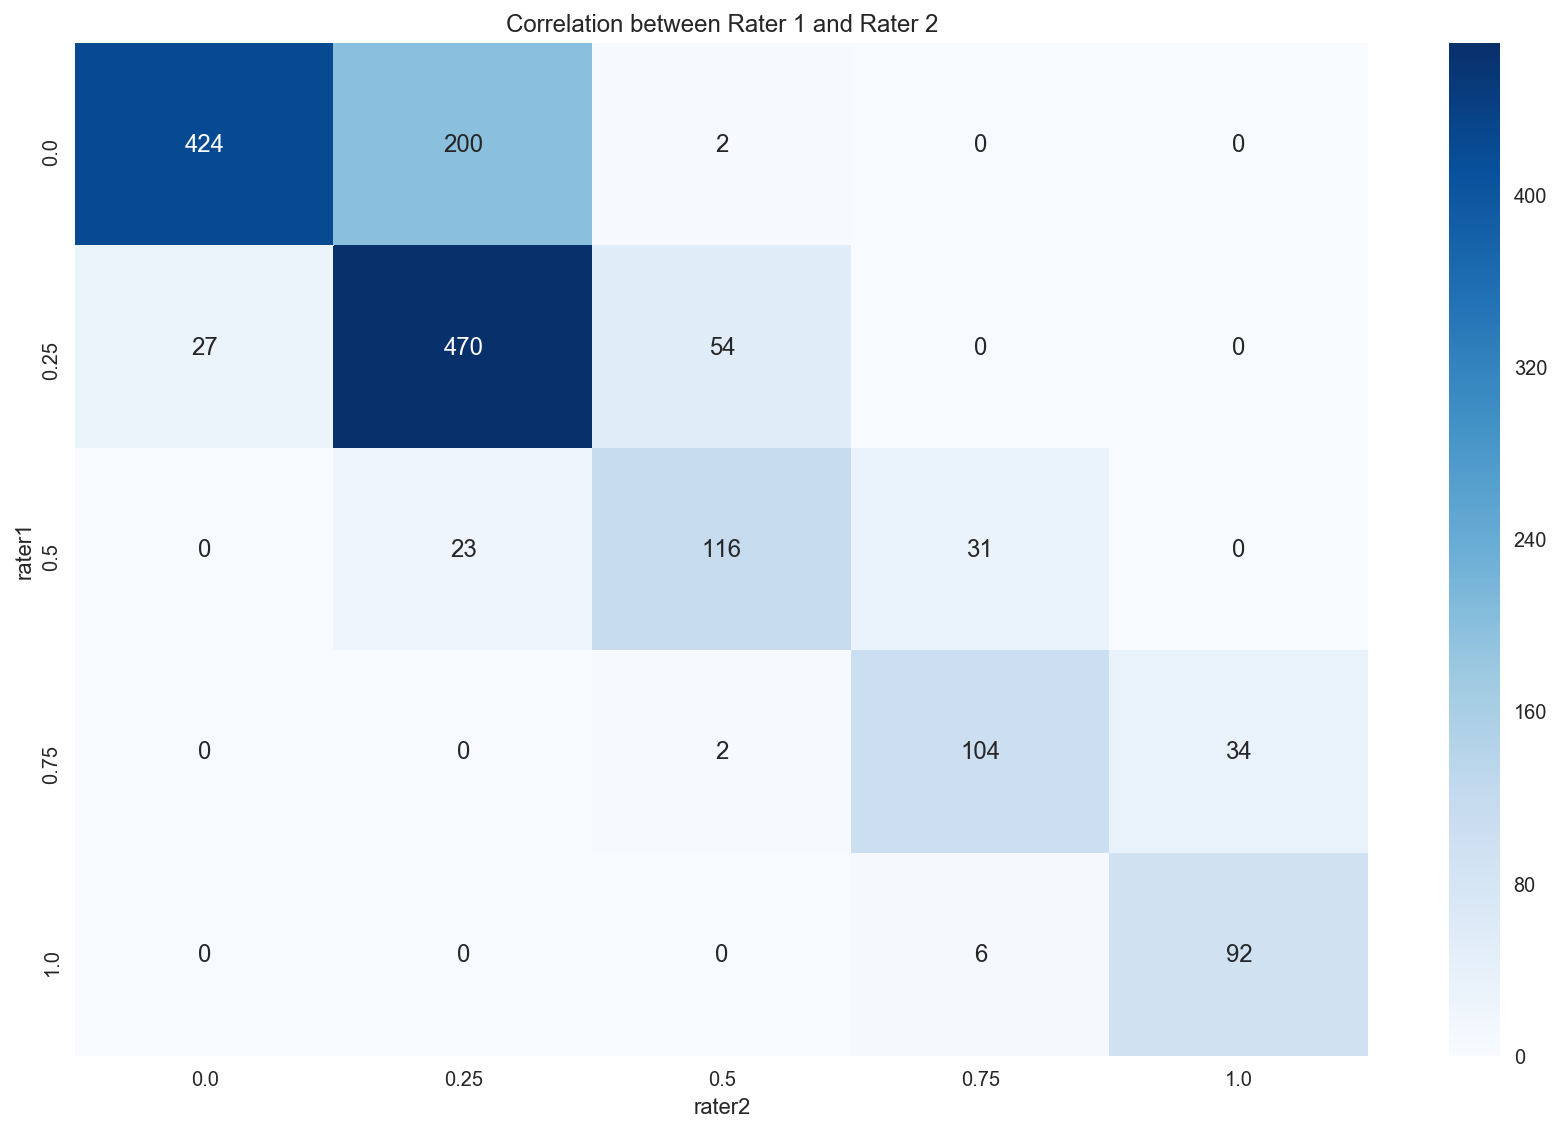

In [12]:
# crosstab
pd.crosstab(players.rater1, players.rater2)

# 两个数据组合
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pd.crosstab(players["rater1"], players["rater2"]), cmap="Blues", annot=True, fmt="d", ax=ax)
ax.set_title("Correlation between Rater 1 and Rater 2")
fig.tight_layout()


In [13]:
# skintone
players["skintone"] = players[["rater1", "rater2"]].mean(axis=1)
players[:5]


,birthday,height,weight,position,photoID,rater1,rater2,skintone
playerShort,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250


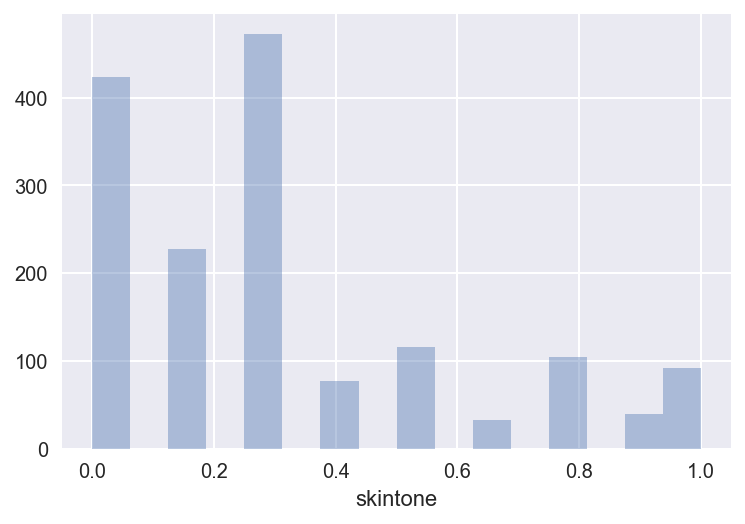

In [14]:
sns.distplot(players["skintone"], kde=False)


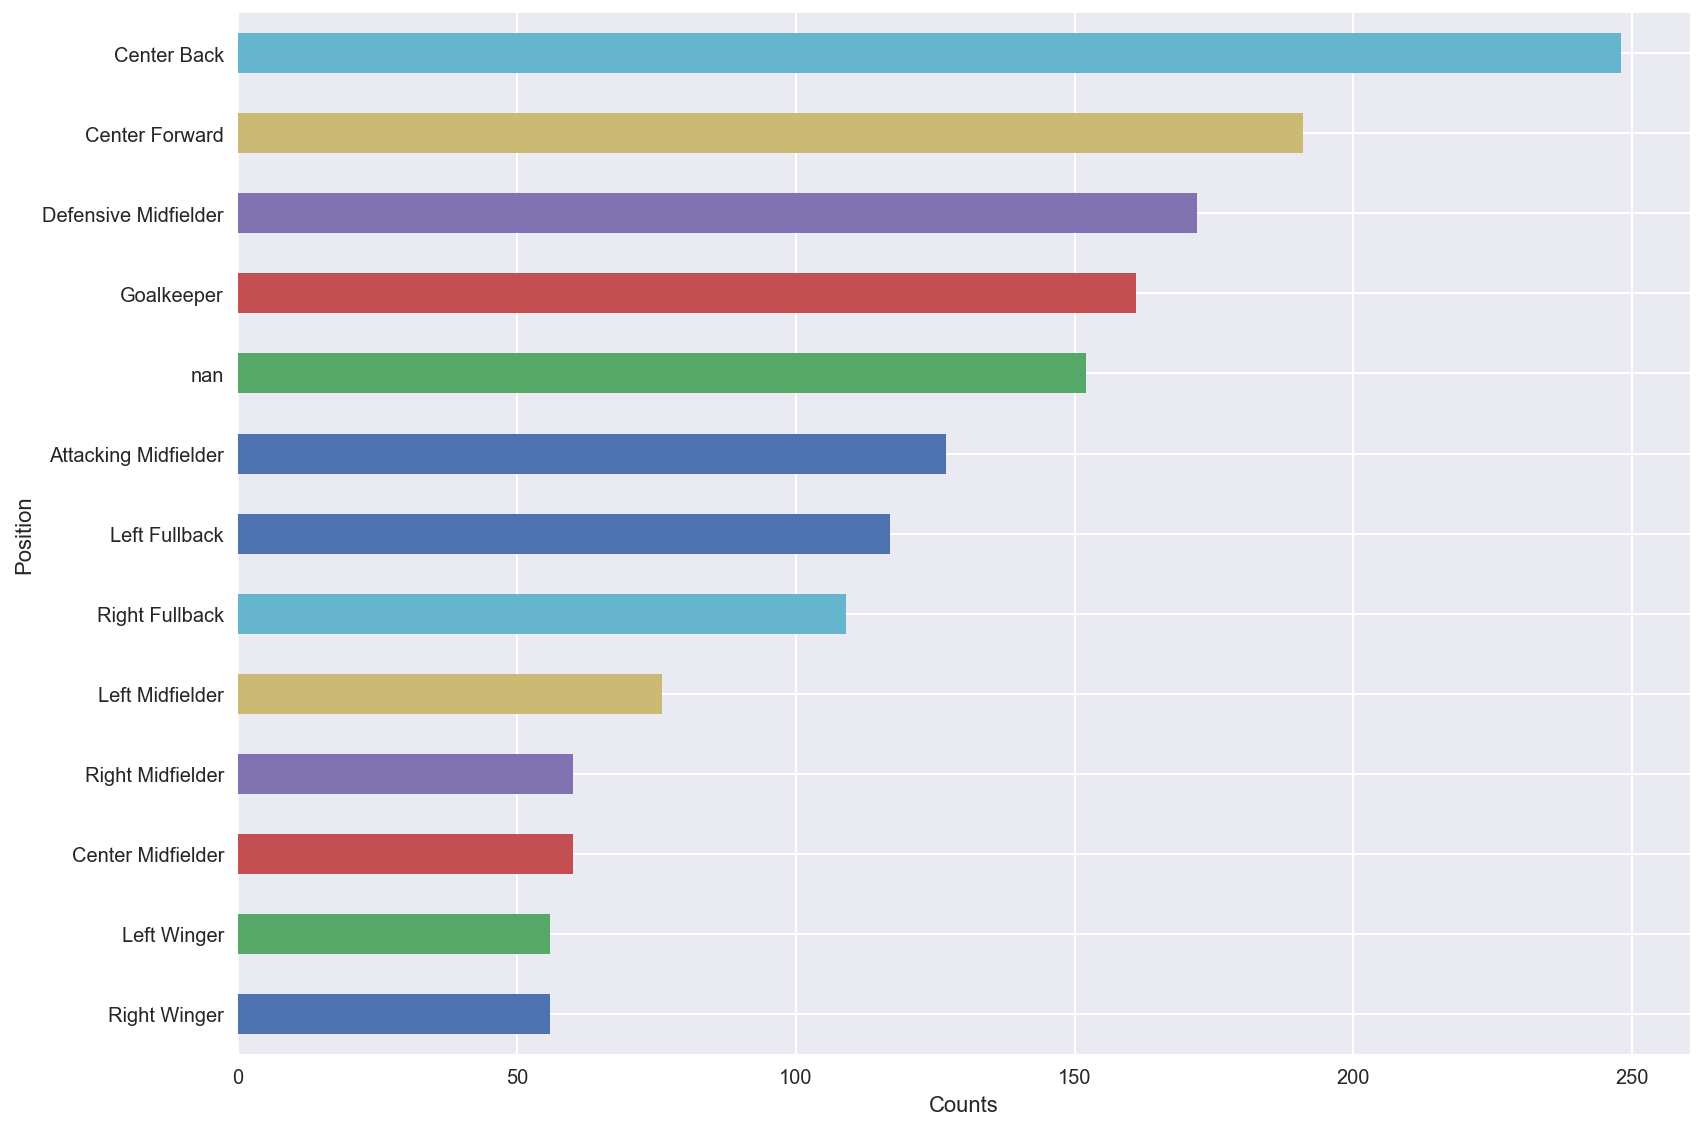

In [15]:
# position
fig, ax = plt.subplots(figsize=(12, 8))
players["position"].value_counts(dropna=False, ascending=True).plot(kind="barh", ax=ax)
ax.set_ylabel("Position")
ax.set_xlabel("Counts")
fig.tight_layout()


In [16]:
# 合并球员位置
position_types = players["position"].unique()
print(position_types)

# 合并到4个位置
defense = ['Center Back', 'Defensive Midfielder', 'Left Fullback', 'Right Fullback', ]
midfield = ['Right Midfielder', 'Center Midfielder', 'Left Midfielder', ]
forward = ['Attacking Midfielder', 'Left Winger', 'Right Winger', 'Center Forward']
keeper = 'Goalkeeper'

players.loc[players["position"].isin(defense), "position_agg"] = "Defense"
players.loc[players['position'].isin(midfield), 'position_agg'] = "Midfield"
players.loc[players['position'].isin(forward), 'position_agg'] = "Forward"
players.loc[players['position'].eq(keeper), 'position_agg'] = "Keeper"
players[:5]


['Center Back' 'Attacking Midfielder' 'Right Midfielder'
 'Center Midfielder' 'Goalkeeper' 'Defensive Midfielder' 'Left Fullback'
 nan 'Left Midfielder' 'Right Fullback' 'Center Forward' 'Left Winger'
 'Right Winger']


,birthday,height,weight,position,photoID,rater1,rater2,skintone,position_agg
playerShort,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125,Defense
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125,Forward
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250,Midfield
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000,Midfield
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250,Defense


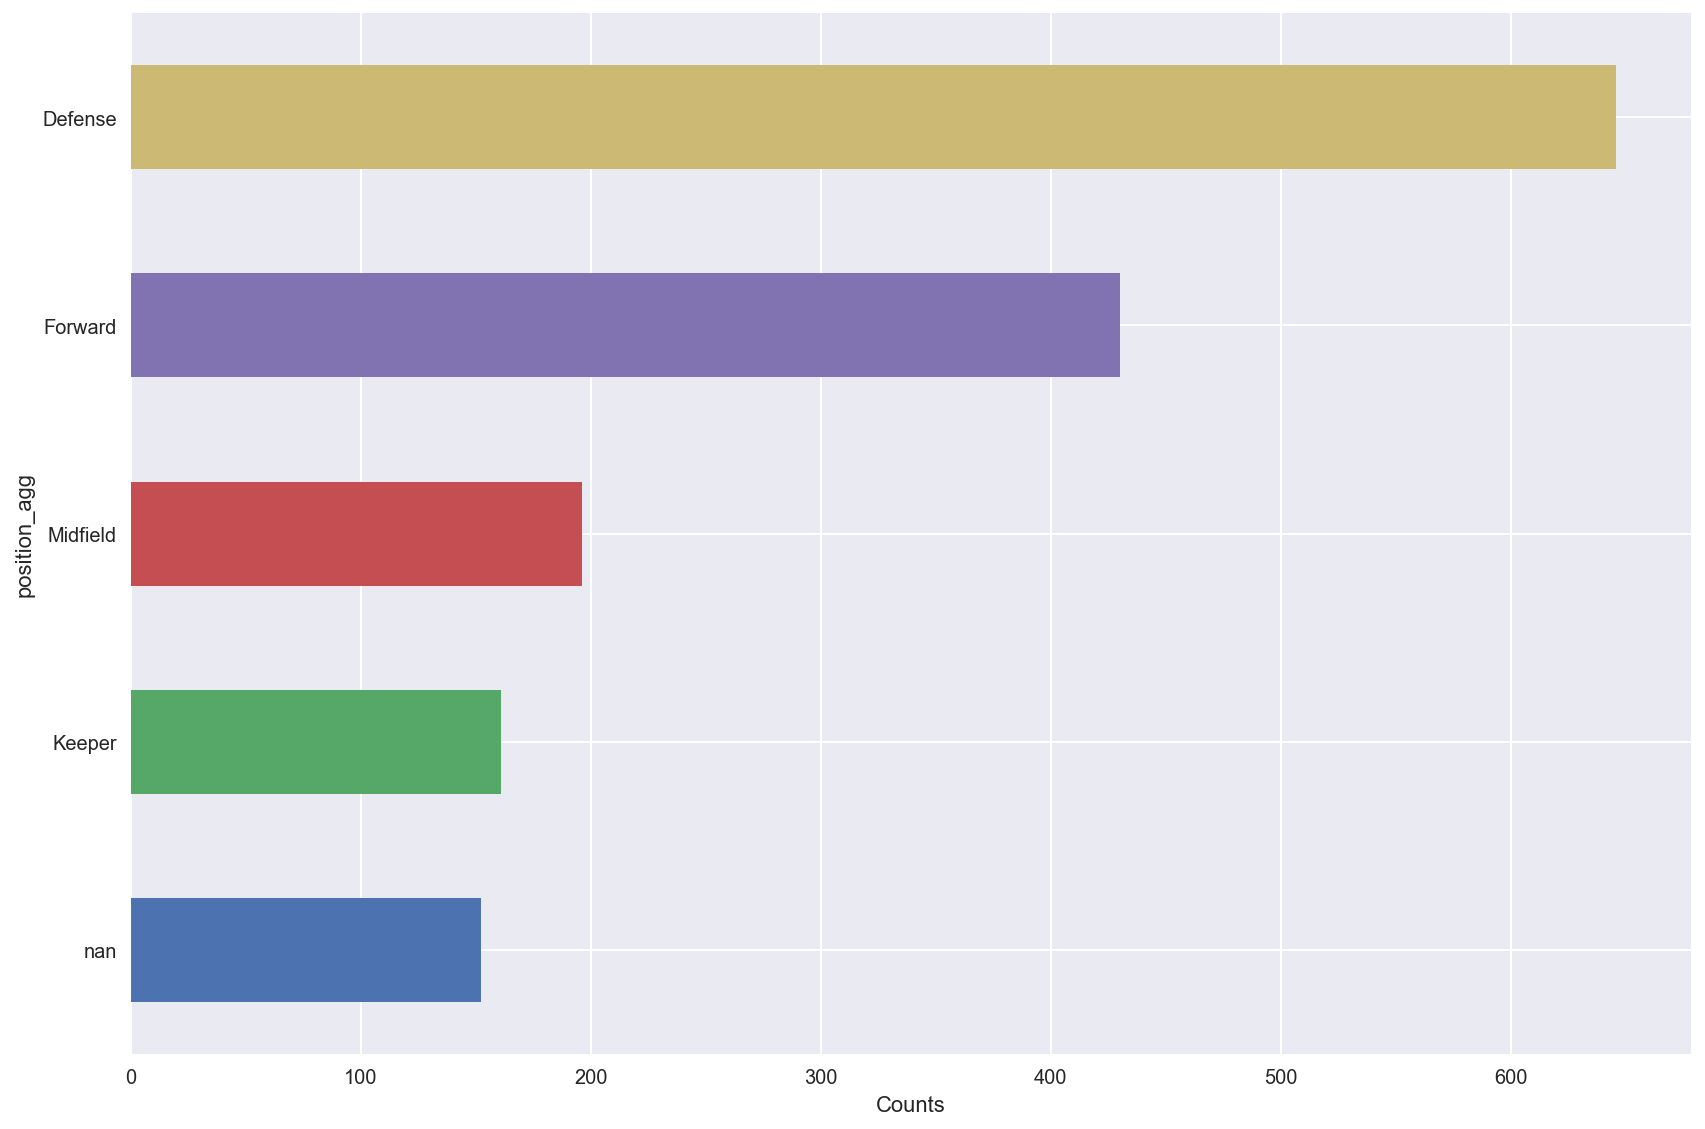

In [17]:
# 查看position_agg值的分布情况
fig, ax = plt.subplots(figsize=(12, 8))
players["position_agg"].value_counts(dropna=False, ascending=True).plot(kind="barh", ax=ax)
ax.set_ylabel("position_agg")
ax.set_xlabel("Counts")
fig.tight_layout()


D:\Coding\Anaconda3\envs\idata\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """
D:\Coding\Anaconda3\envs\idata\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBB7EAA6A0>,
      dtype=object)

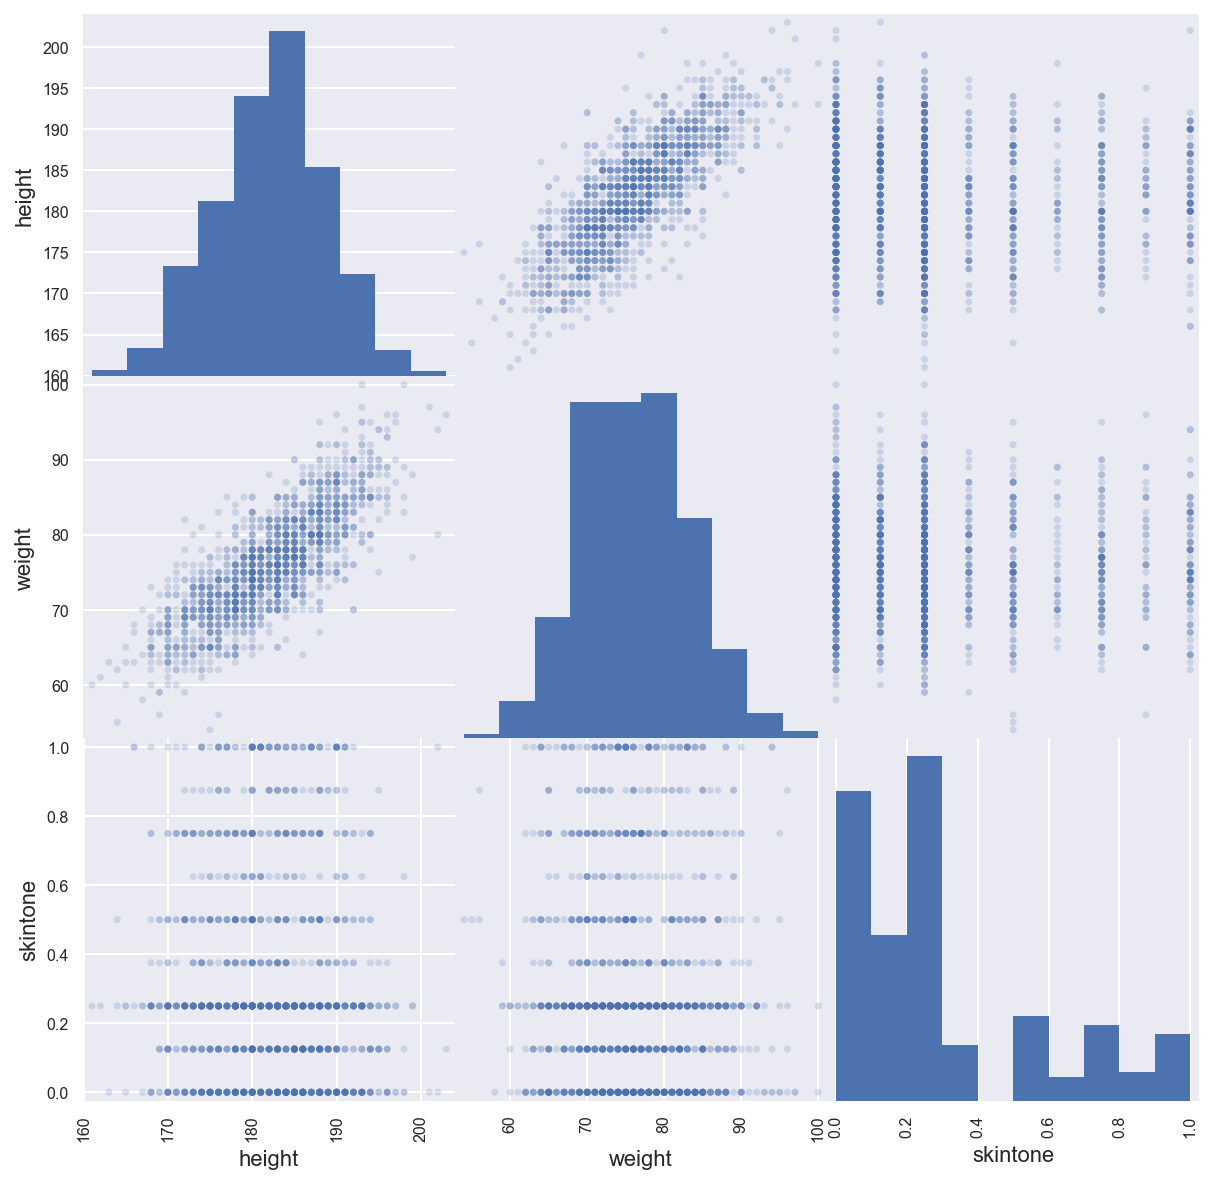

In [18]:
# 查看height,weight,skintone的相关性
from pandas.tools.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(players[["height", "weight", "skintone"]], alpha=0.2, diagonal="hist", ax=ax)

# 可以看出身高和体重是有关系的，但是肤色和身高与体重之间是没有关系的


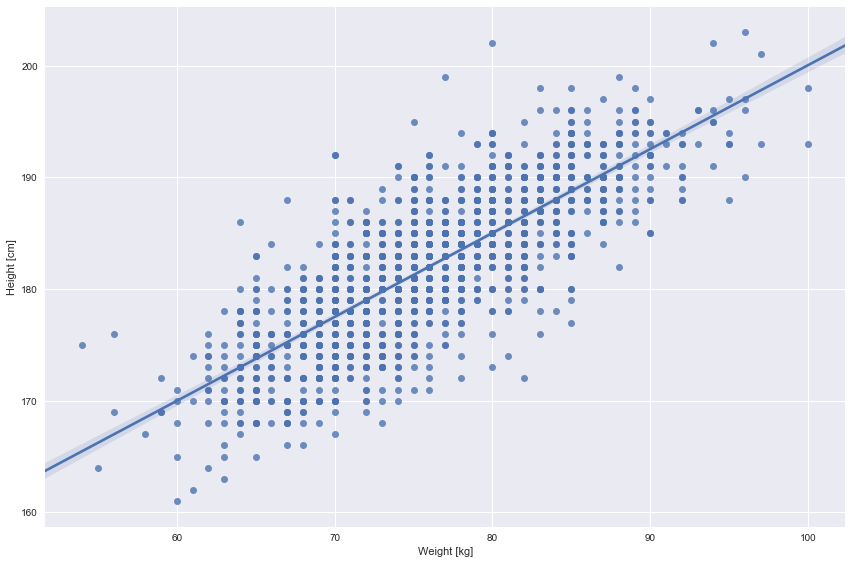

In [18]:
# 查看height和weight之间的关系
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot("weight", "height", data=players, ax=ax)
ax.set_ylabel("Height [cm]")
ax.set_xlabel("Weight [kg]")
fig.tight_layout()


In [19]:
# 使用qcut，把weight从连续值改为区间值
weight_categories = ["vlow_weight",
                     "low_weight",
                     "mid_weight",
                     "high_weight",
                     "vhigh_weight",
                     ]
# qcut
players["weightclass"] = pd.qcut(players["weight"], len(weight_categories), weight_categories)
players[:5]


,birthday,height,weight,position,photoID,rater1,rater2,skintone,position_agg,weightclass
playerShort,,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125,Defense,low_weight
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125,Forward,low_weight
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250,Midfield,vlow_weight
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000,Midfield,mid_weight
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250,Defense,low_weight


In [20]:
# 使用qcut，修改height

height_categories = ["vlow_height",
                     "low_height",
                     "mid_height",
                     "high_height",
                     "vhigh_height",
                     ]

players['heightclass'] = pd.qcut(players['height'],
                                 len(height_categories),
                                 height_categories)
players[:5]


,birthday,height,weight,position,photoID,rater1,rater2,skintone,position_agg,weightclass,heightclass
playerShort,,,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125,Defense,low_weight,mid_height
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125,Forward,low_weight,mid_height
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250,Midfield,vlow_weight,vlow_height
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000,Midfield,mid_weight,low_height
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250,Defense,low_weight,low_height


In [21]:
# qcut skintone

pd.qcut(players['skintone'], 3)


playerShort
aaron-hughes              (-0.001, 0.125]
aaron-hunt                (-0.001, 0.125]
aaron-lennon                (0.125, 0.25]
aaron-ramsey              (-0.001, 0.125]
abdelhamid-el-kaoutari      (0.125, 0.25]
abdou-traore_2                (0.25, 1.0]
abdoulaye-diallo_2            (0.25, 1.0]
abdoulaye-keita_2             (0.25, 1.0]
abdoulwhaid-sissoko           (0.25, 1.0]
abdul-rahman-baba             (0.25, 1.0]
abdul-razak                   (0.25, 1.0]
abel-aguilar                  (0.25, 1.0]
abelaziz-barrada          (-0.001, 0.125]
abou-diaby                    (0.25, 1.0]
adam-bodzek                 (0.125, 0.25]
adam-campbell             (-0.001, 0.125]
adam-federici             (-0.001, 0.125]
adam-hlousek              (-0.001, 0.125]
adam-johnson              (-0.001, 0.125]
adam-morgan                 (0.125, 0.25]
adam-pinter               (-0.001, 0.125]
adam-smith_3              (-0.001, 0.125]
adam-szalai                 (0.125, 0.25]
adan                  

In [22]:
# qcut skintone，直接使用默认的名字
players['skintoneclass'] = pd.qcut(players['skintone'], 3)
players[:5]


,birthday,height,weight,position,photoID,rater1,rater2,skintone,position_agg,weightclass,heightclass,skintoneclass
playerShort,,,,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]"
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125,Forward,low_weight,mid_height,"(-0.001, 0.125]"
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250,Midfield,vlow_weight,vlow_height,"(0.125, 0.25]"
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000,Midfield,mid_weight,low_height,"(-0.001, 0.125]"
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250,Defense,low_weight,low_height,"(0.125, 0.25]"


In [23]:
# pandas profiling
pandas_profiling.ProfileReport(players)


Number of variables,13
Number of observations,1585
Total Missing (%),1.7%
Total size in memory,129.0 KiB
Average record size in memory,83.3 B
Numeric,3
Categorical,5
Boolean,0
Date,0
Text (Unique),2
Rejected,2


In [27]:
# birthday
# 数据是2013的数据，所以用2013-01-01减去生日
print(players["birthday"].head(5))
players["birth_date"] = pd.to_datetime(players["birthday"], format="%d.%m.%Y")
# 算入闰年，所以除以365.25
players["age_years"] = (pd.to_datetime("2013-01-01") - players["birth_date"]).dt.days / 365.25
print(players["age_years"])


playerShort
aaron-hughes              08.11.1979
aaron-hunt                04.09.1986
aaron-lennon              16.04.1987
aaron-ramsey              26.12.1990
abdelhamid-el-kaoutari    17.03.1990
Name: birthday, dtype: object
playerShort
aaron-hughes              33.149897
aaron-hunt                26.327173
aaron-lennon              25.713895
aaron-ramsey              22.017796
abdelhamid-el-kaoutari    22.795346
abdou-traore_2            24.958248
abdoulaye-diallo_2        20.758385
abdoulaye-keita_2         22.370979
abdoulwhaid-sissoko       22.787132
abdul-rahman-baba         18.502396
abdul-razak               20.139630
abel-aguilar              27.986311
abelaziz-barrada          23.537303
abou-diaby                26.644764
adam-bodzek               27.318275
adam-campbell             18.001369
adam-federici             27.917864
adam-hlousek              24.032854
adam-johnson              25.470226
adam-morgan               18.699521
adam-pinter               24.555784
adam-

In [28]:
players_cleaned_variables = players.columns.tolist()
players_cleaned_variables


['birthday',
 'height',
 'weight',
 'position',
 'photoID',
 'rater1',
 'rater2',
 'skintone',
 'position_agg',
 'weightclass',
 'heightclass',
 'skintoneclass',
 'birth_date',
 'age_years']

In [29]:
# 去掉无用的列
players_cleaned_variables = [  # 'birthday',
    'height',
    'weight',
    #                              'position',
    #                              'photoID',
    #                              'rater1',
    #                              'rater2',
    'skintone',
    'position_agg',
    'weightclass',
    'heightclass',
    'skintoneclass',
    #                              'birth_date',
    'age_years']


In [31]:
pandas_profiling.ProfileReport(players[players_cleaned_variables])


Number of variables,9
Number of observations,1585
Total Missing (%),1.4%
Total size in memory,79.5 KiB
Average record size in memory,51.3 B
Numeric,4
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [32]:
# 存入csv
players[players_cleaned_variables].to_csv(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\RedCard\data\\cleaned_players.csv.gz",
    compression="gzip")
